In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
original = pd.read_csv("diabetes/diabetic_data_original.csv")
original.shape


(101766, 50)

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

balanced_data = pd.read_csv("diabetes/diabetic_data_balanced.csv")
balanced_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,94332918,94297905,Caucasian,Female,[50-60),NaN,2,1,1,3,MD,NaN,49,0,21,0,0,1,599,496,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30
9995,94354164,7154802,AfricanAmerican,Male,[50-60),NaN,2,1,1,1,WC,Cardiology,43,2,7,0,0,0,427,426,726,5,None,None,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,<30
9996,94367076,67099194,Caucasian,Male,[70-80),[50-75),1,3,5,4,MC,NaN,64,0,7,0,0,0,250.8,396,397,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30
9997,94444062,60479757,Caucasian,Male,[60-70),NaN,6,1,17,1,NaN,Family/GeneralPractice,72,0,14,0,0,0,599,496,41,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30


In [4]:
balanced_data.info()
balanced_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 50 columns):
encounter_id                9999 non-null int64
patient_nbr                 9999 non-null int64
race                        9819 non-null object
gender                      9999 non-null object
age                         9999 non-null object
weight                      300 non-null object
admission_type_id           9999 non-null int64
discharge_disposition_id    9999 non-null int64
admission_source_id         9999 non-null int64
time_in_hospital            9999 non-null int64
payer_code                  235 non-null object
medical_specialty           6362 non-null object
num_lab_procedures          9999 non-null int64
num_procedures              9999 non-null int64
num_medications             9999 non-null int64
number_outpatient           9999 non-null int64
number_emergency            9999 non-null int64
number_inpatient            9999 non-null int64
diag_1                   

(9999, 50)

/Users/jennazhou/opt/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


<function matplotlib.pyplot.show(*args, **kw)>

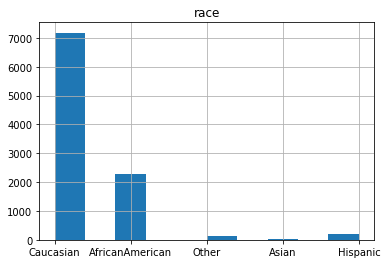

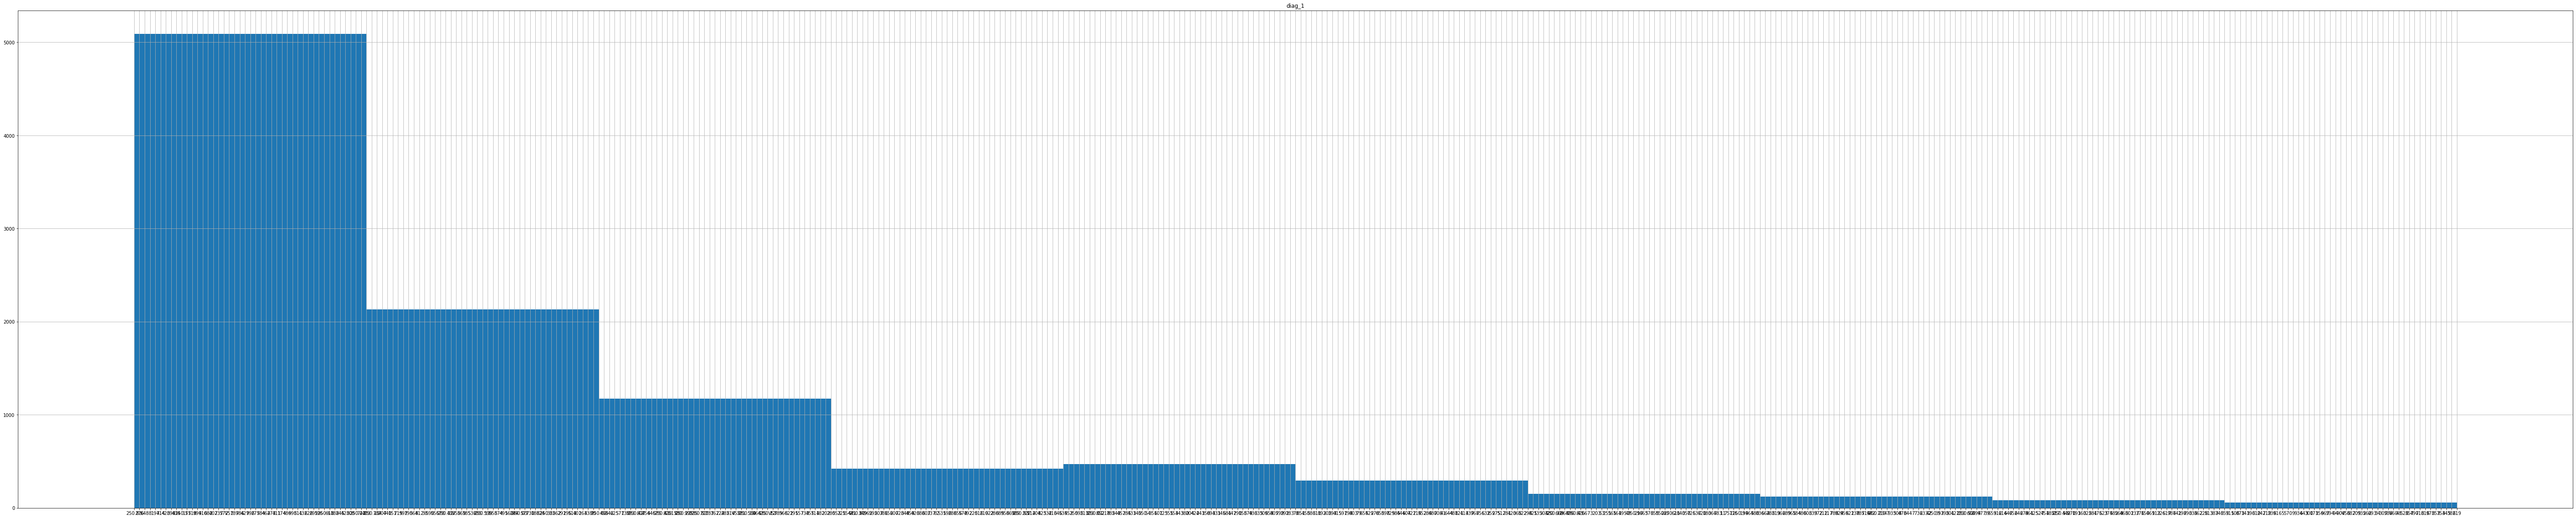

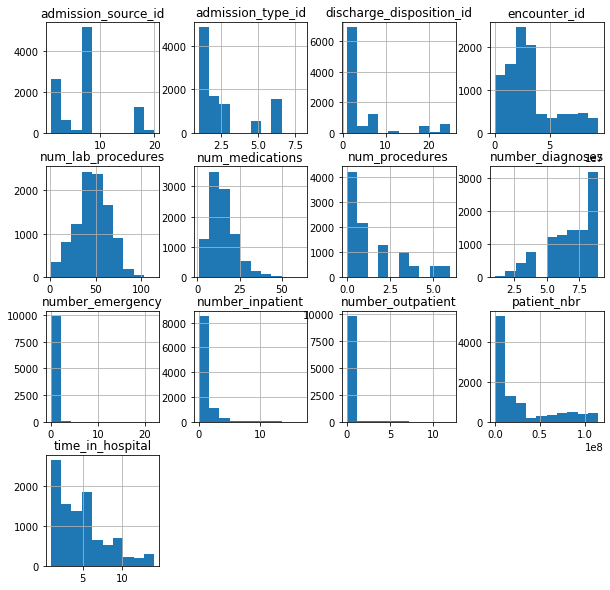

In [5]:
%matplotlib inline 
#Split datasets to training set and test set
#Need to understand the proportion of the labels in the dataset to determin whether we should use straitfied sampling
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.set_title("race")
balanced_data["race"].hist(ax=ax1)
fig2 = plt.figure(figsize = (100,20))
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_title("diag_1")
balanced_data["diag_1"].hist(ax=ax2)
fig = plt.figure(figsize = (10,10))
ax = fig.gca() #gca = get current axes
balanced_data.hist(ax=ax)
plt.show
# balanced_data["readmitted"].value_counts()

In [6]:
#Drop the attributes with mostly NaN values, then drop the rows with NaN values
#Drop ecounter ID and patient ID too because they do not affect readmission of the patients
new_balanced_data = balanced_data.drop(["weight", "payer_code", "encounter_id", "patient_nbr"], axis=1)
#Fill in the NaN values in column "medical_specialty" with "missing" to indicate missing values
new_balanced_data["medical_specialty"].fillna("missing", inplace=True)
new_balanced_data["race"].fillna("missing", inplace=True)
#Drop the rows with NaN values in diagnosis to avoid filling in too much inaccurate information
new_balanced_data.dropna(inplace=True)
# new_balanced_data["medical_specialty"].unique()
new_balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9758 entries, 1 to 9998
Data columns (total 46 columns):
race                        9758 non-null object
gender                      9758 non-null object
age                         9758 non-null object
admission_type_id           9758 non-null int64
discharge_disposition_id    9758 non-null int64
admission_source_id         9758 non-null int64
time_in_hospital            9758 non-null int64
medical_specialty           9758 non-null object
num_lab_procedures          9758 non-null int64
num_procedures              9758 non-null int64
num_medications             9758 non-null int64
number_outpatient           9758 non-null int64
number_emergency            9758 non-null int64
number_inpatient            9758 non-null int64
diag_1                      9758 non-null object
diag_2                      9758 non-null object
diag_3                      9758 non-null object
number_diagnoses            9758 non-null int64
max_glu_serum         

In [7]:
new_balanced_data.groupby("race").count()
#Combine Asian, Hispanic and Other because too few samples in Asian and Hispanic
new_balanced_data.replace("Asian", "Other", inplace=True)
new_balanced_data.replace("Hispanic", "Other", inplace=True)
new_balanced_data.groupby("race").count()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AfricanAmerican,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204,2204
Caucasian,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029,7029
Other,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352
missing,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173


In [8]:
new_balanced_data.groupby("age").count()
#Combine age categories below 40 to [0-40) because too few samples in each case
#Same for categories above 80
new_balanced_data.replace("[0-10)", "[0-40)", inplace=True)
new_balanced_data.replace("[10-20)", "[0-40)", inplace=True)
new_balanced_data.replace("[20-30)", "[0-40)", inplace=True)
new_balanced_data.replace("[30-40)", "[0-40)", inplace=True)
new_balanced_data.replace("[80-90)", "[80-100)", inplace=True)
new_balanced_data.replace("[90-100)", "[80-100)", inplace=True)
new_balanced_data.groupby("age").count()


,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
[0-40),696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696,696
[40-50),1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064
[50-60),1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781
[60-70),2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132,2132
[70-80),2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673,2673
[80-100),1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412,1412


In [9]:
new_balanced_data.groupby("admission_type_id").count()
#Group 4,5 and 8 together to form "Otherwise"
#Now, 4 is mapped to "Otherwise"
new_balanced_data["admission_type_id"].replace(5, 4, inplace=True)
new_balanced_data["admission_type_id"].replace(8, 4, inplace=True)

new_balanced_data.groupby("admission_type_id").count()


,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
admission_type_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733
2,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651,1651
3,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284
4,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561,561
6,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529,1529


In [10]:
new_balanced_data.groupby("discharge_disposition_id").count()
# Combine the categories with small values into "Otherwise" (int 26)
new_balanced_data["discharge_disposition_id"].replace(4, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(7, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(8, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(9, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(10, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(11, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(12, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(13, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(14, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(22, 26, inplace=True)
new_balanced_data["discharge_disposition_id"].replace(23, 26, inplace=True)
# discharge_disposition_id 
new_balanced_data.groupby("discharge_disposition_id").count()

,race,gender,age,admission_type_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
discharge_disposition_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461,5461
2,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223
3,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
5,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410,410
6,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172
18,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484
25,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593
26,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390


In [11]:
new_balanced_data.groupby("admission_source_id").count()
# Combine the minor categories into "Otherwise" and mapped to 21
new_balanced_data["admission_source_id"].replace(3, 21, inplace=True)
new_balanced_data["admission_source_id"].replace(5, 21, inplace=True)
new_balanced_data["admission_source_id"].replace(6, 21, inplace=True)
new_balanced_data["admission_source_id"].replace(8, 21, inplace=True)
new_balanced_data["admission_source_id"].replace(9, 21, inplace=True)
new_balanced_data["admission_source_id"].replace(20, 21, inplace=True)
new_balanced_data.groupby("admission_source_id").count()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
admission_source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164,2164
2,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
4,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582
7,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023,5023
17,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
21,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363


In [12]:
new_balanced_data.groupby("medical_specialty").count()
for name in list(new_balanced_data["medical_specialty"]):
    if name[:7] == "Surgery":
        new_balanced_data["medical_specialty"].replace(name, "Surgery", inplace=True)
new_balanced_data["medical_specialty"].replace("Obsterics&Gynecology-GynecologicOnco", "ObstetricsandGynecology", inplace=True)

kept_med_specialty = ["Cardiology", "Family/GeneralPractice", "InternalMedicine", "Nephrology", "ObstetricsandGynecology", "Orthopedics", "Orthopedics-Reconstructive", "Psychiatry", "Pulmonology", "Surgery", "Urology", "missing"]
print(len(kept_med_specialty))
for name in list(new_balanced_data["medical_specialty"]):
    if name not in kept_med_specialty: 
        new_balanced_data["medical_specialty"].replace(name, "Other", inplace=True)

print(new_balanced_data["medical_specialty"].unique().shape)
new_balanced_data.groupby("medical_specialty").count()

12
(13,)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
medical_specialty,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cardiology,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862,862
Family/GeneralPractice,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265,1265
InternalMedicine,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938
Nephrology,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
ObstetricsandGynecology,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
Orthopedics,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129
Orthopedics-Reconstructive,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
Other,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485
Psychiatry,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169


In [13]:
# Based on the correlation matrix, num_lab_procedures do not contribute much to the readmission rate, hence drop it
new_balanced_data.drop(columns="num_lab_procedures", inplace=True)
# new_balanced_data.groupby("num_lab_procedures").count()

In [14]:
# This part can only be run once
new_balanced_data.groupby("diag_1").count()
# Group the categories together according to the first three digits of ICD9
for icd in list(new_balanced_data["diag_1"]):
    if icd[:4] == "250.":
        new_balanced_data["diag_1"].replace(icd, "Diabetes", inplace=True)
    elif icd[0] == "V":
        new_balanced_data["diag_1"].replace(icd, "Other", inplace=True)
    elif 390 <= int(icd) <= 459 or int(icd) == 785:
        new_balanced_data["diag_1"].replace(icd, "Circulatory Disease", inplace=True)
    elif 460 <= int(icd) <= 519 or int(icd) == 786:
        new_balanced_data["diag_1"].replace(icd, "Respiratory Disease", inplace=True)
    elif 520 <= int(icd) <= 579 or int(icd) == 787:
        new_balanced_data["diag_1"].replace(icd, "Digestive Disease", inplace=True)
    elif 800 <= int(icd) <= 999:
        new_balanced_data["diag_1"].replace(icd, "Injury and poisoning", inplace=True)
    elif 710 <= int(icd) <= 739:
        new_balanced_data["diag_1"].replace(icd, "Musculoskeletal Disease", inplace=True)
    elif 580 <= int(icd) <= 629 or int(icd) == 788:
        new_balanced_data["diag_1"].replace(icd, "Genitourinary Disease", inplace=True)
    elif 140 <= int(icd) <= 239:
        new_balanced_data["diag_1"].replace(icd, "Neoplasms", inplace=True)
    else:
        new_balanced_data["diag_1"].replace(icd, "Other", inplace=True)



In [15]:
new_balanced_data.groupby("diag_1").count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
diag_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Circulatory Disease,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546,3546
Diabetes,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857,857
Digestive Disease,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815
Genitourinary Disease,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
Injury and poisoning,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648,648
Musculoskeletal Disease,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424
Neoplasms,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314
Other,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612
Respiratory Disease,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159


Based on the given group name of the disease, the three diagnoses are changes to the corresponding disease categories. In total there are 9 big categories.

In [16]:
# This part can only be run once
for icd in list(new_balanced_data["diag_2"]):
    if icd[:4] == "250.":
        new_balanced_data["diag_2"].replace(icd, "Diabetes", inplace=True)
    elif icd[0] == "V" or icd[0] == "E":
        new_balanced_data["diag_2"].replace(icd, "Other", inplace=True)
    elif 390 <= int(icd) <= 459 or int(icd) == 785:
        new_balanced_data["diag_2"].replace(icd, "Circulatory Disease", inplace=True)
    elif 460 <= int(icd) <= 519 or int(icd) == 786:
        new_balanced_data["diag_2"].replace(icd, "Respiratory Disease", inplace=True)
    elif 520 <= int(icd) <= 579 or int(icd) == 787:
        new_balanced_data["diag_2"].replace(icd, "Digestive Disease", inplace=True)
    elif 800 <= int(icd) <= 999:
        new_balanced_data["diag_2"].replace(icd, "Injury and poisoning", inplace=True)
    elif 710 <= int(icd) <= 739:
        new_balanced_data["diag_2"].replace(icd, "Musculoskeletal Disease", inplace=True)
    elif 580 <= int(icd) <= 629 or int(icd) == 788:
        new_balanced_data["diag_2"].replace(icd, "Genitourinary Disease", inplace=True)
    elif 140 <= int(icd) <= 239:
        new_balanced_data["diag_2"].replace(icd, "Neoplasms", inplace=True)
    else:
        new_balanced_data["diag_2"].replace(icd, "Other", inplace=True)


In [17]:
new_balanced_data.groupby("diag_2").count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
diag_2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Circulatory Disease,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294,3294
Diabetes,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186
Digestive Disease,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
Genitourinary Disease,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588
Injury and poisoning,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219,219
Musculoskeletal Disease,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
Neoplasms,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
Other,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770
Respiratory Disease,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915,915


In [18]:
# This part can only be run once
for icd in list(new_balanced_data["diag_3"]):
    if icd[:4] == "250.":
        new_balanced_data["diag_3"].replace(icd, "Diabetes", inplace=True)
    elif icd[0] == "V" or icd[0] == "E":
        new_balanced_data["diag_3"].replace(icd, "Other", inplace=True)
    elif 390 <= int(icd) <= 459 or int(icd) == 785:
        new_balanced_data["diag_3"].replace(icd, "Circulatory Disease", inplace=True)
    elif 460 <= int(icd) <= 519 or int(icd) == 786:
        new_balanced_data["diag_3"].replace(icd, "Respiratory Disease", inplace=True)
    elif 520 <= int(icd) <= 579 or int(icd) == 787:
        new_balanced_data["diag_3"].replace(icd, "Digestive Disease", inplace=True)
    elif 800 <= int(icd) <= 999:
        new_balanced_data["diag_3"].replace(icd, "Injury and poisoning", inplace=True)
    elif 710 <= int(icd) <= 739:
        new_balanced_data["diag_3"].replace(icd, "Musculoskeletal Disease", inplace=True)
    elif 580 <= int(icd) <= 629 or int(icd) == 788:
        new_balanced_data["diag_3"].replace(icd, "Genitourinary Disease", inplace=True)
    elif 140 <= int(icd) <= 239:
        new_balanced_data["diag_3"].replace(icd, "Neoplasms", inplace=True)
    else:
        new_balanced_data["diag_3"].replace(icd, "Other", inplace=True)

new_balanced_data.groupby("diag_3").count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
diag_3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Circulatory Disease,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029
Diabetes,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886,886
Digestive Disease,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368
Genitourinary Disease,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584
Injury and poisoning,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
Musculoskeletal Disease,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189
Neoplasms,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143
Other,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698
Respiratory Disease,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665,665


In [19]:
new_balanced_data.groupby("number_diagnoses").count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
number_diagnoses,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432
4,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758,758
5,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224
6,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272
7,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421
8,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446
9,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205


---
Only 10% of the original dataset is used in the balanced datasets for the purpose of the speed (The original dataset has 10k-ish columns, while the balanced dataset only has 9999 columns.)  

From balanced_data.info(), we can see that some attributes such as "weight", "payer_code", and "medical_specialty" are filled very sparsely with many "NaN" values (missing rate > 50%). "Weight" and "payer_code" are dropped as they are not very related to readmission. "Medical_specialty" is kept and NaN value are filled with "missing" to indicate they are missing. This is because "medical_specialty" is likely to impace the result of readmission.

Although, this observation should probably be justified using some techniques to rank the level of significance of the features.  

---

In [20]:
new_balanced_data["diag_1"].unique().size
# new_balanced_data["diag_2"].count()

9

<function matplotlib.pyplot.show(*args, **kw)>

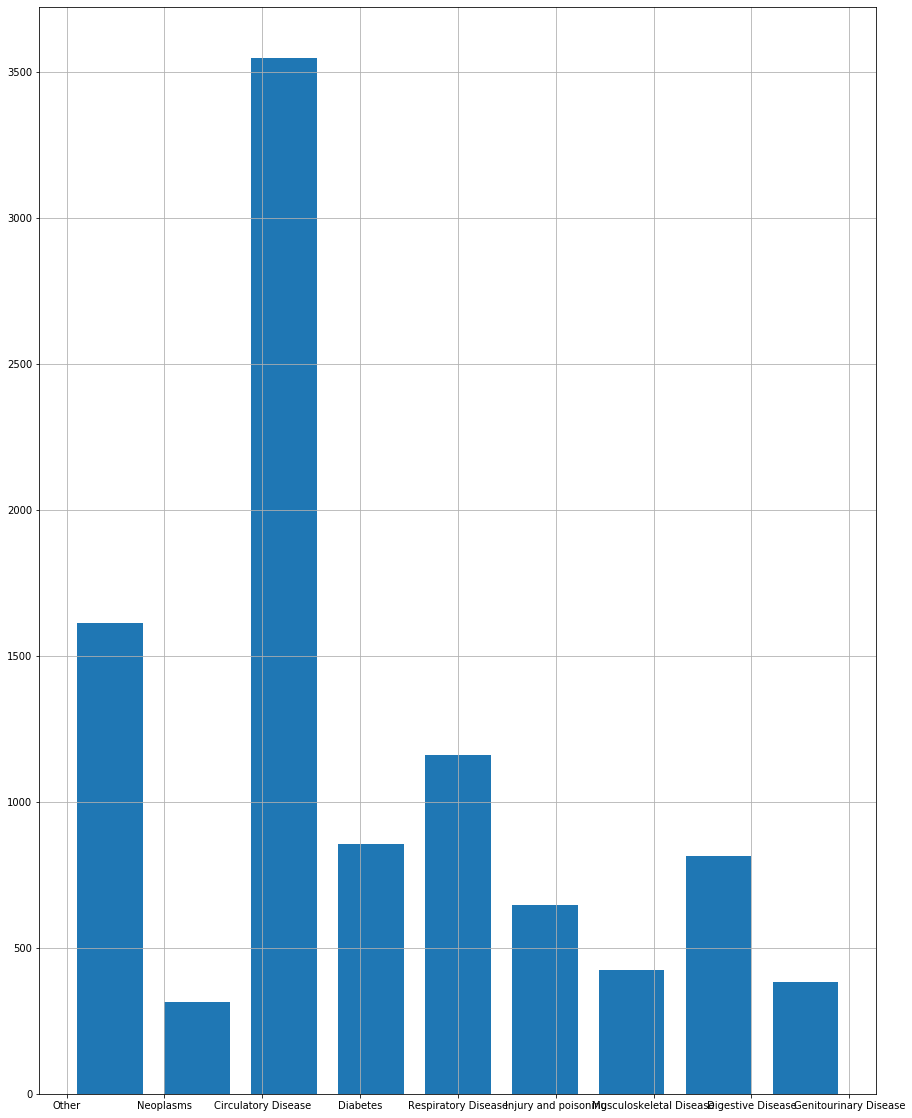

In [21]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca() #gca = get current axes
new_balanced_data["diag_1"].hist(ax=ax, bins=9,rwidth=0.75,)
plt.show

In [22]:
#separate the numerically typed and non-numerically types columns first
from pandas.api.types import is_numeric_dtype

num_attrib = list([])
obj_attrib = list([])
for col in new_balanced_data.columns:
    if is_numeric_dtype(new_balanced_data[col]):
        num_attrib.append(col)
    else:
        obj_attrib.append(col)
print(num_attrib)
print(obj_attrib)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [23]:
#Some numeric values do not have numeric meaning, hence should be encoded as one-hot as well
no_numeric_meaning_attrib = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
new_obj_attrib = obj_attrib + no_numeric_meaning_attrib
new_num_attrib = [x for x in num_attrib if x not in no_numeric_meaning_attrib]
new_obj_attrib.remove("readmitted")
print(new_obj_attrib)
print(new_num_attrib)

['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
['time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [24]:
# Convert datatype of values of new_obj_attrib to object
for itm in new_obj_attrib:
    new_balanced_data[itm] = new_balanced_data[itm].astype(dtype='str')
    
display(new_balanced_data["race"])
display(new_balanced_data["admission_type_id"])

1             Caucasian
2       AfricanAmerican
3             Caucasian
4             Caucasian
5             Caucasian
             ...       
9994          Caucasian
9995    AfricanAmerican
9996          Caucasian
9997          Caucasian
9998            missing
Name: race, Length: 9758, dtype: object

1       1
2       1
3       1
4       1
5       2
       ..
9994    2
9995    2
9996    1
9997    6
9998    2
Name: admission_type_id, Length: 9758, dtype: object

---
Correlation only exists between numeric value. Hence in order to see the correlation between columns, we need to convert everything to numeric / encoded them to numeric values.

---

In [51]:
#Get the labels for prediction
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score


encoder = LabelEncoder()
# encoder = LabelBinarizer()
y = encoder.fit_transform(new_balanced_data["readmitted"])
# print(y)
cats = np.unique(y)
cats

array([0, 1, 2])

In [26]:
#Set num_attrib_scaled as the base dataframe, and add others to the base dataframe 
final_df = pd.DataFrame(new_balanced_data[new_num_attrib], columns=new_num_attrib)
final_df.reset_index(drop=True, inplace=True)
# display(final_df)

#Convert textual categories into numerical values and append to the base df
encoder = LabelBinarizer()
for obj in new_obj_attrib:
    one_hot = encoder.fit_transform(new_balanced_data[obj])
    classes = list(encoder.classes_)
#     display(classes)
    if len(classes) <= 2:
        new_df = pd.DataFrame(one_hot, columns=[obj])
    else:
        attr = [obj + " " + s for s in classes]
        new_df = pd.DataFrame(one_hot, columns=attr)
    final_df = pd.concat([final_df, new_df], axis=1, sort=False)

    
X = final_df.values
X


array([[ 3,  0, 18, ...,  0,  0,  1],
       [ 2,  5, 13, ...,  0,  0,  1],
       [ 2,  1, 16, ...,  0,  0,  1],
       ...,
       [ 4,  0,  7, ...,  1,  0,  0],
       [ 1,  0, 14, ...,  0,  0,  0],
       [ 5,  0, 11, ...,  0,  0,  0]])

/Users/jennazhou/opt/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


0
1
2


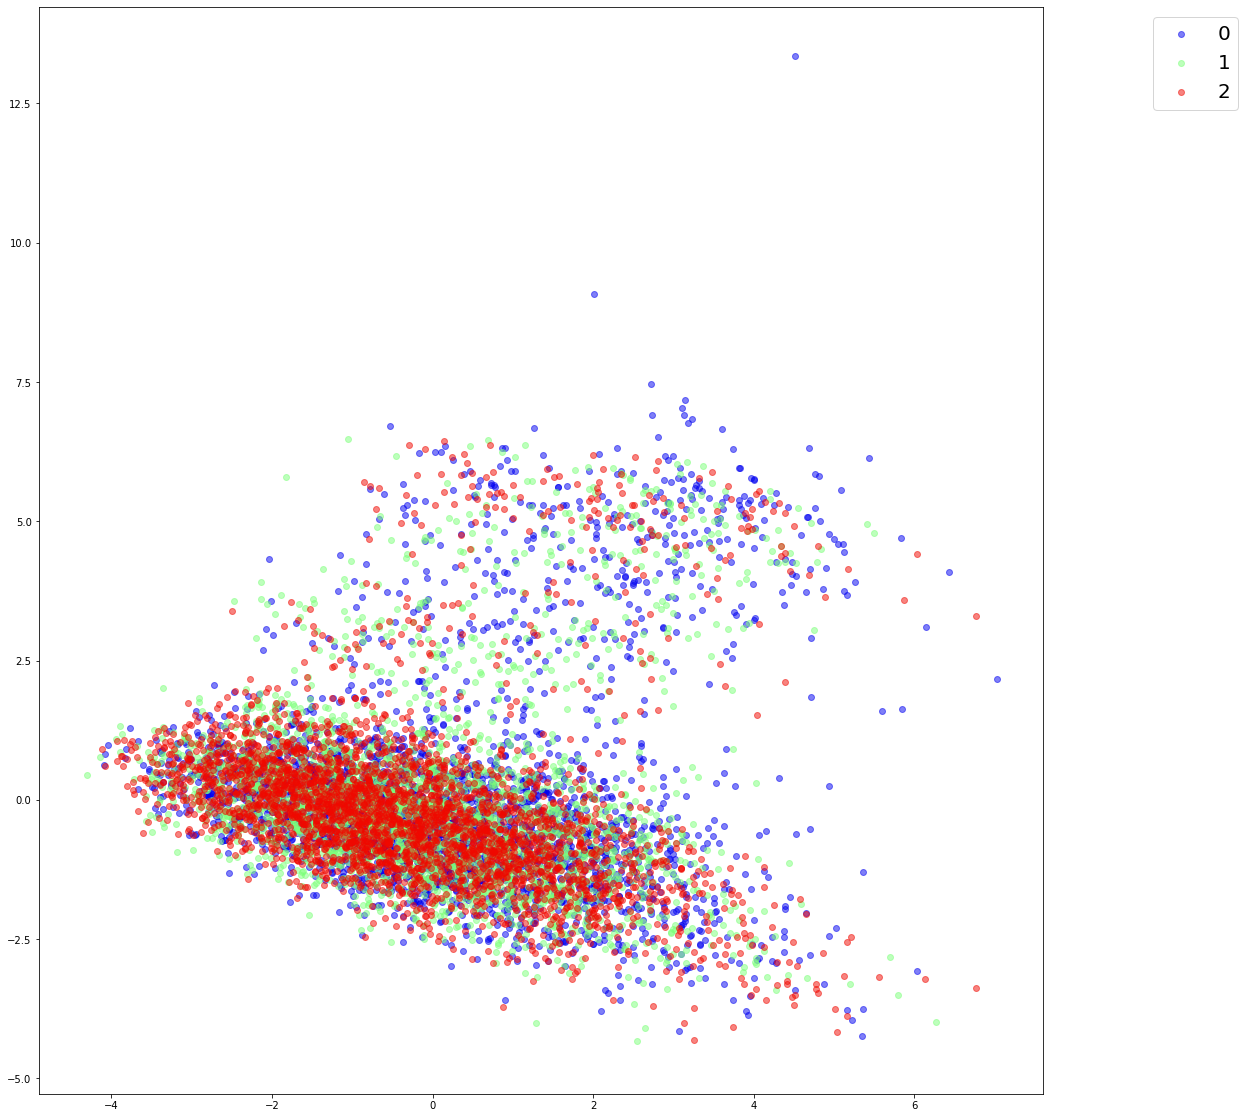

In [27]:
#######VISUALISATION
#PCA:
# rescale the features, so they have the same variance
import sklearn.decomposition
import matplotlib

for k in range(len(final_df.columns)-1):
    X[:,k] = X[:,k] / np.std(X[:,k])
pca = sklearn.decomposition.PCA()
pca_result = pca.fit_transform(X)
p1,p2 = pca_result[:,0], pca_result[:,1]

cmap = matplotlib.cm.get_cmap('jet') # return a colored map with specific name 'jet'
cdict = {0: cmap(0.1), 1: cmap(0.5), 2:cmap(0.9)} 
fig,ax = plt.subplots(figsize=(18,20))
for lvl in np.unique(y):
    print(lvl)
    i = np.where(y == lvl)
    ax.scatter(p1[i], p2[i], label=np.unique(y)[lvl], marker='o', alpha=0.5, c=[cdict[lvl]])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1),prop={'size': 20})
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9758 samples in 0.152s...
[t-SNE] Computed neighbors for 9758 samples in 16.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9758
[t-SNE] Computed conditional probabilities for sample 2000 / 9758
[t-SNE] Computed conditional probabilities for sample 3000 / 9758
[t-SNE] Computed conditional probabilities for sample 4000 / 9758
[t-SNE] Computed conditional probabilities for sample 5000 / 9758
[t-SNE] Computed conditional probabilities for sample 6000 / 9758
[t-SNE] Computed conditional probabilities for sample 7000 / 9758
[t-SNE] Computed conditional probabilities for sample 8000 / 9758
[t-SNE] Computed conditional probabilities for sample 9000 / 9758
[t-SNE] Computed conditional probabilities for sample 9758 / 9758
[t-SNE] Mean sigma: 2.908176
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.417480
[t-SNE] KL divergence after 1000 iterations: 1.923165
0
1
2


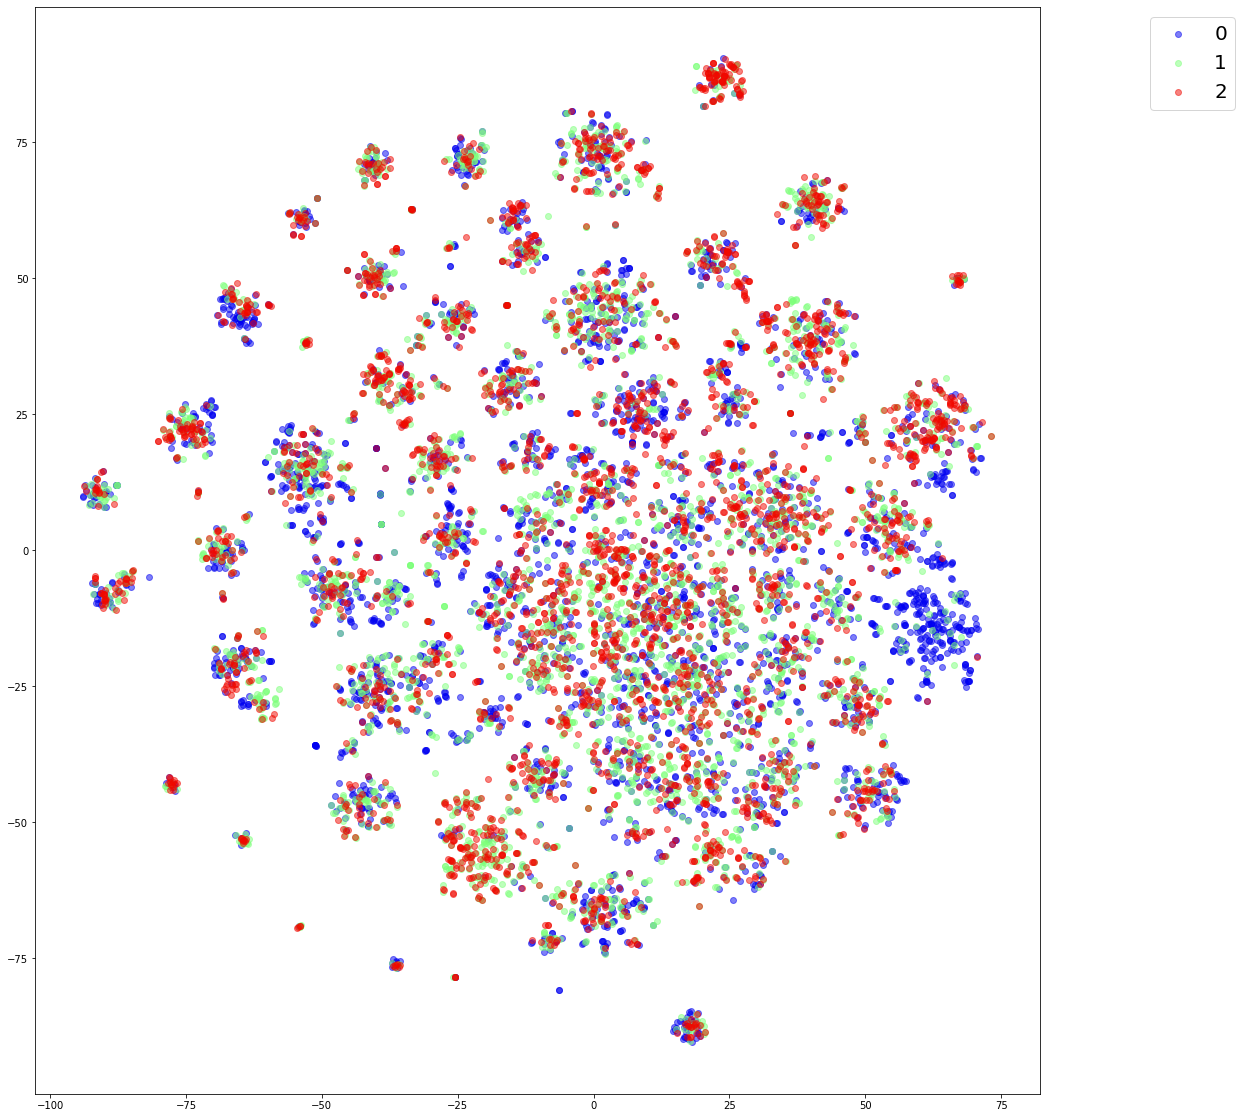

In [37]:
import sklearn.decomposition
import sklearn.manifold

tsne = sklearn.manifold.TSNE(n_components=2, verbose=1)
#for tSNE, you MUST tell how many components to keep
tsne_results = tsne.fit_transform(X)
tsne_results
p1,p2 = tsne_results[:,0], tsne_results[:,1]

cmap = matplotlib.cm.get_cmap('jet') # return a colored map with specific name 'jet'
cdict = {0: cmap(0.1), 1: cmap(0.5), 2:cmap(0.9)} 
fig,ax = plt.subplots(figsize=(18,20))
for lvl in np.unique(y):
    print(lvl)
    i = np.where(y == lvl)
    ax.scatter(p1[i], p2[i], label=np.unique(y)[lvl], marker='o', alpha=0.5, c=[cdict[lvl]])
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1),prop={'size': 20})
plt.show()

In [28]:
final_df["readmitted"] = y
display(final_df.shape)

corr_matrix = final_df.corr()
corr_matrix["readmitted"].sort_values(ascending=False)[:31]

(9758, 137)

readmitted                                      1.000000
discharge_disposition_id 1                      0.140297
discharge_disposition_id 25                     0.099868
medical_specialty Cardiology                    0.094311
medical_specialty ObstetricsandGynecology       0.079241
max_glu_serum None                              0.066859
num_procedures                                  0.064386
admission_type_id 6                             0.061778
admission_source_id 2                           0.061758
pioglitazone No                                 0.060845
medical_specialty Orthopedics-Reconstructive    0.053211
diag_1 Neoplasms                                0.047450
admission_source_id 1                           0.042971
A1Cresult >8                                    0.036477
admission_source_id 4                           0.035944
age [50-60)                                     0.035663
race missing                                    0.035236
admission_type_id 2            

In [29]:
from IPython.display import display

pd.set_option('display.max_rows', 500)
corr_matrix["readmitted"].sort_values(ascending=False)
corr_matrix["readmitted"].size

137

In [30]:
# Split the dataset into training and test sets
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split.get_n_splits(X, y)

for train_index, test_index in split.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

TRAIN: 7806 TEST: 1952
(7806, 136) (7806,) (1952, 136) (1952,)


In [31]:
# Check the proportion of data in the train and test set

# def original_proportions(data):
#     props = {}
#     for value in set(data["target"]):
#         data_value = [i for i in data["target"] if i==value]
#         props[value] = len(data_value) / len(data["target"])
#     return props

def subset_proportions(subset):
    props = {}
    for value in set(subset):
        data_value = [i for i in subset if i==value]
        props[value] = len(data_value) / len(subset)
    return props

   
compare_props = pd.DataFrame({
    "Overall": subset_proportions(y),
    "Stratified tr": subset_proportions(y_train),
    "Stratified ts": subset_proportions(y_test),
})


# add two more columns to the table
compare_props["Strat. tr %error"] = 100 * compare_props["Stratified tr"] / compare_props["Overall"] - 100
compare_props["Strat. ts %error"] = 100 * compare_props["Stratified ts"] / compare_props["Overall"] - 100

print(compare_props)

    Overall  Stratified tr  Stratified ts  Strat. tr %error  Strat. ts %error
0  0.338389       0.338329       0.338627         -0.017590          0.070344
1  0.334802       0.334871       0.334529          0.020430         -0.081698
2  0.326809       0.326800       0.326844         -0.002716          0.010860


In [32]:
#Scale the train set: 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Standard Scaling:
std_scaler = StandardScaler() 
X_train_stdscaled = std_scaler.fit_transform(X_train)

#MinMax Scaling:
mm_scaler = MinMaxScaler()
X_train_mmscaled = mm_scaler.fit_transform(X_train)

Since the problem is a multi-class classification problem, we need to train multi-class classifiers
## Multiclass Classification

In [33]:
# Use single layer perceptron to predict the outcome
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [34]:
#Take an example of patient first
pat_eg = X[2]

In [45]:
#####Single multi-class classifier:

#####SGD multiclass classifier######
sgd = SGDClassifier(max_iter=5, tol=None, random_state=42,
                   loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
sgd.fit(X_train_stdscaled, y_train)

#####Gaussian Naive Bayes multiclass classifier######
gnb = GaussianNB() 
gnb.fit(X_train_stdscaled, y_train)

#####Multinomial Naive Bayes multiclass classifier######
mnb = MultinomialNB()
mnb.fit(X_train_mmscaled, y_train)

#####Logistic regression multiclass classifier######
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_stdscaled, y_train)

#####SVM multiclass classifier######
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_stdscaled, y_train)

#####Decision Tree#####
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_stdscaled, y_train)

single_clfs = {
    "Single Layer Perceptron": sgd, 
    "Gaussian Naive Bayes": gnb, 
    "Multinomial Naive Bayes": mnb, 
    "Logistic Regression": log_reg, 
    "Support Vector Machine": svm, 
    "Decision Tree": dt
}


In [52]:
#Get CV accurracies for single classifier
for clf in single_clfs:
    if (clf == "Multinomial Naive Bayes"):
        print (clf, single_clfs[clf].score(X_train_mmscaled, y_train))
        print("Cross validated accuracy", np.mean(cross_val_score(single_clfs[clf], X_train_mmscaled, y_train, cv=5, scoring="accuracy")))
        print("\n")
    else:
        print (clf, single_clfs[clf].score(X_train_stdscaled, y_train))
        print("Cross validated accuracy", np.mean(cross_val_score(single_clfs[clf], X_train_stdscaled, y_train, cv=5, scoring="accuracy")))
        print("\n")

Single Layer Perceptron 0.4333845759672047
Cross validated accuracy 0.4230066087515718


Gaussian Naive Bayes 0.41275941583397385
Cross validated accuracy 0.41519036764410344


Multinomial Naive Bayes 0.48206507814501665
Cross validated accuracy 0.4605436942896679


Logistic Regression 0.5216500128106585
Cross validated accuracy 0.49205744044372224


Support Vector Machine 0.7012554445298488


KeyboardInterrupt: 

In [53]:
from sklearn.multiclass import OneVsOneClassifier
#Iterate through the dictionary of single classifiers to create OVO version
ovo_clfs = {}
c = 0
for clf in single_clfs:
    ovo_clf = OneVsOneClassifier(single_clfs[clf])
    ovo_clfs[c] = ovo_clf
    c = c + 1
    if (clf == "Multinomial Naive Bayes"):
        ovo_clf.fit(X_train_mmscaled, y_train)
        print ("OVO", clf, ovo_clf.score(X_train_mmscaled, y_train))
        print("Cross validated accuracy", np.mean(cross_val_score(ovo_clf, X_train_mmscaled, y_train, cv=5, scoring="accuracy")))
        print("\n")
    else:
        ovo_clf.fit(X_train_stdscaled, y_train)
        print ("OVO", clf, ovo_clf.score(X_train_stdscaled, y_train))
        print("Cross validated accuracy", np.mean(cross_val_score(ovo_clf, X_train_stdscaled, y_train, cv=5, scoring="accuracy")))
        print("\n")

OVO Single Layer Perceptron 0.42262362285421473
Cross validated accuracy 0.4276196108571527


OVO Gaussian Naive Bayes 0.41288752241865234
Cross validated accuracy 0.4155748186633047


OVO Multinomial Naive Bayes 0.48206507814501665
Cross validated accuracy 0.4605436942896679


OVO Logistic Regression 0.5219062259800153
Cross validated accuracy 0.49487565425164115


OVO Support Vector Machine 0.7043300025621317
Cross validated accuracy 0.5034578444987086


OVO Decision Tree 0.9997437868306431
Cross validated accuracy 0.437612794582415




Apply kernel trick to see whether can get higher accuracies

In [ ]:
#Apply kernel trick to the features
from sklearn.kernel_approximation import RBFSampler

rbf_features = RBFSampler(gamma=1, random_state=42, n_components = 200)
X_train_features = rbf_features.fit_transform(X_train)
print(X_train.shape, "->", X_train_features.shape) #dimensionality of the sample increases from 4 to 100

for clf in single_clfs:
    if (clf != "Multinomial Naive Bayes"):
        single_clfs[clf].fit(X_train_features, y_train)
        print(clf, " with kernel trick", single_clfs[clf].score(X_train_features, y_train))
        print("Cross validated accuracy with kernel trick", np.mean(cross_val_score(single_clfs[clf], X_train_features, y_train, cv=5, scoring="accuracy")))
        print("\n")

In [ ]:
#A base line comparison for giving all values the same
from sklearn.base import BaseEstimator

class NotXClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
not_readmitted_clf = NotXClassifier()
print("Fake classifier: ", np.mean(cross_val_score(not_readmitted_clf, X_train_stdscaled, y_train, cv=5, scoring="accuracy")))

In [55]:
#Ensemble classifiers:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
#######RandomForestClassifier##########
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train_stdscaled, y_train)


#########Hard Voting classifier##############
hvoting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rnd_clf), ('svc', svm)],
    voting='hard')
hvoting_clf.fit(X_train_stdscaled, y_train)

#########Soft Voting Classifier###########
svoting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rnd_clf), ('svc', svm)],
    voting='soft')
svoting_clf.fit(X_train_stdscaled, y_train)

#########Bagging classifier###########
bag_clf = BaggingClassifier(dt, n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
#n_jobs = use all of the available CPU cores
bag_clf.fit(X_train_stdscaled, y_train)

######Pasting classifier###########
pst_clf = BaggingClassifier(dt, n_estimators=500,
    max_samples=100, bootstrap=False, random_state=42)
#n_jobs = use all of the available CPU cores
pst_clf.fit(X_train_stdscaled, y_train)

##########AdaBoost classifier#########
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train_stdscaled, y_train)

############GradientBoosting Classifier#####
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_stdscaled, y_train)


ens_clfs = {
    "Random Forest Classifier":rnd_clf,
    "Hard Voting Classifier": hvoting_clf,
    "Soft Voting Classifier": svoting_clf,
    "Bagging Classifier": bag_clf,
    "Pasting Classifier": pst_clf,
    "AdaBoost Classifier": ada_clf,
    "GradientBoostingRegressor Classifier": gbrt
}


In [ ]:
#Get CV accurracies for ensemble classifier
for clf in ens_clfs:
        if clf != "GradientBoostingRegressor Classifier":
            print (clf, ens_clfs[clf].score(X_train_stdscaled, y_train))
            print("Cross validated accuracy", np.mean(cross_val_score(ens_clfs[clf], X_train_stdscaled, y_train, cv=5, scoring="accuracy")))
            print("\n")
        else:
            print (clf, ens_clfs[clf].score(X_train_stdscaled, y_train))
            print("\n")

#GradientBoosting cannot print cross validation


In [57]:
##### Applying the methods to the X_test and evaluation
all_clfs = {}
all_clfs.update(single_clfs)
all_clfs.update(ovo_clfs)
all_clfs.update(ens_clfs)
# def evaluate()
all_clfs["OVO_SGD"] = all_clfs.pop(0)
all_clfs["OVO_GNB"] = all_clfs.pop(1)
all_clfs["OVO_MNB"] = all_clfs.pop(2)
all_clfs["OVO_LR"] = all_clfs.pop(3)
all_clfs["OVO_SVC"] = all_clfs.pop(4)
all_clfs["OVO_DT"] = all_clfs.pop(5)
all_clfs

{'Single Layer Perceptron': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
               l1_ratio=0.15, learning_rate='constant', loss='perceptron',
               max_iter=5, n_iter_no_change=5, n_jobs=None, penalty=None,
               power_t=0.5, random_state=42, shuffle=True, tol=None,
               validation_fraction=0.1, verbose=0, warm_start=False),
 'Gaussian Naive Bayes': GaussianNB(priors=None, var_smoothing=1e-09),
 'Multinomial Naive Bayes': MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 'Logistic Regression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=200,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'Support Vector Machine': SVC

In [ ]:
#######EVALUATION#########
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score


cross validation accuracy as shown above  
Below metrics are: confusion matrix, Root Mean Square Error(RMSE), Mean Absolute Error(MAE), precision, recall, F1, trade-offs, ROC curvers and AUC

In [ ]:
#Confusion matrix#
#for each clf, confusion matix is in the order of 0(<30), 1(>30) and 2(No)
for clf in all_clfs:
    if clf == "Multinomial Naive Bayes" or clf == "OVO_MNB":
        y_train_pred = cross_val_predict(all_clfs[clf], X_train_mmscaled, y_train, cv=5)
        print("Confusion matrix of", clf, "is:")
        print(multilabel_confusion_matrix(y_train, y_train_pred, labels = cats))
        print("\n")
    elif clf == "GradientBoostingRegressor Classifier":
        continue
    else:
        y_train_pred = cross_val_predict(all_clfs[clf], X_train_stdscaled, y_train, cv=5)
        print("Confusion matrix of", clf, "is:")
        print(multilabel_confusion_matrix(y_train, y_train_pred, labels = cats))
        print("\n")


In [ ]:
#####MSE#########
for clf in all_clfs:
    if clf == "Multinomial Naive Bayes" or clf == "OVO_MNB":
        y_train_pred = cross_val_predict(all_clfs[clf], X_train_mmscaled, y_train, cv=5)
        print("RMSE of", clf, "is:", mean_squared_error(y_train, y_train_pred))
        print("Cross validated negative RMSE:", cross_val_score(all_clfs[clf], X_train_mmscaled, y_train,
                             scoring = "neg_mean_squared_error", cv=5))
        print("\n")
    else:
        y_train_pred = cross_val_predict(all_clfs[clf], X_train_stdscaled, y_train, cv=5)
        print("RMSE of", clf, "is:", mean_squared_error(y_train, y_train_pred))
        print("Cross validated negative RMSE:", cross_val_score(all_clfs[clf], X_train_stdscaled, y_train,
                             scoring = "neg_mean_squared_error", cv=5))
        print("\n")



In [ ]:
#####Precision, Recall and F1########
pdict = {}
rdict = {}
f1dict = {}

for clf in all_clfs:
    if clf == "OVO_SVC":
        y_train_pred = cross_val_predict(all_clfs[clf], X_train_stdscaled, y_train, cv=5)
        p = precision_score(y_train, y_train_pred, average='micro')
        r = recall_score(y_train, y_train_pred, average='micro')
        f1 = f1_score(y_train, y_train_pred, average='micro')
        pdict[clf] = p
        rdict[clf] = r
        f1dict[clf] = f1
        print("Precision of", clf, "is:", p)
        print("Recall of", clf, "is:", r)
        print("F1 of", clf, "is:", f1)
        print("\n")

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred = cross_val_predict(all_clfs["Logistic Regression"], X_train_stdscaled, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train_pred, y_train)
# precision_recall_curve: Compute precision-recall pairs for different probability thresholds
# the returned threshold will be in an array, which is increased on 
# the decision function used to compute precision and recall

def plot_pr_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0, 1])
    
    # plt.ylim: Get or set the y-limits of the current axes.
    
plot_pr_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
##########Trade offs between Precision and Recall###########

In [69]:
from sklearn.metrics import accuracy_score
X_test_scale = std_scaler.fit_transform(X_test)
y_pred = svm.predict(X_test_scale)
y_pred_2 = all_clfs["OVO_SVC"].predict(X_test_scale)
y_pred_3 =svoting_clf.predict(X_test_scale)
print(accuracy_score(y_pred, y_test))
print(accuracy_score(y_pred_2, y_test))
print(accuracy_score(y_pred_3, y_test))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred_2, average='macro'))
print(precision_score(y_test, y_pred_3, average='macro'))

0.507172131147541
0.5092213114754098
0.5158811475409836
0.5137506130673066
0.5072616561486776
0.5176863941664254
0.5178466144621294
